<a href="https://colab.research.google.com/github/ppprakharr/MNISTHandwritingClassification/blob/main/MNIST_Digit_classification_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(4)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
# from sklearn.model_selection import train_test_split

Loading the MNIST Data

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
type(x_train)

numpy.ndarray

In [5]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60000 images

Tets data = 10000 images

each image as dimension of 28X28

In [6]:
# printing the 11th image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
x_train[10].shape

(28, 28)

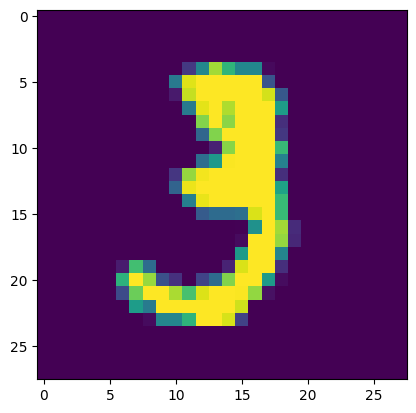

3


In [8]:
# displaying the image
plt.imshow(x_train[10])
plt.show()
print(y_train[50])

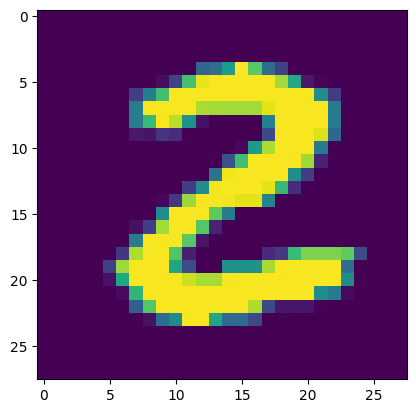

2


In [9]:
# displaying the image
plt.imshow(x_train[25])
plt.show()
print(y_train[25])

Image Labels


In [10]:
# unique values in y_train
print(np.unique(y_train))

# unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use this image to check one hot encoding

All the images have same dimension in this dataset

In [11]:
# scaling the value
x_train = x_train/255
x_test = x_test/255


In [12]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building a simple neural network (RNN)

In [13]:
# setting up some layers for the NN
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(50,activation='relu'),
  keras.layers.Dense(50,activation='relu'),
  keras.layers.Dense(10,activation='sigmoid')
])

In [14]:
# compiling the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
#training the neural network

model.fit(x_train,y_train, epochs = 24)

Epoch 1/24
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2824 - accuracy: 0.9189
Epoch 2/24
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1340 - accuracy: 0.9600
Epoch 3/24
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1001 - accuracy: 0.9699
Epoch 4/24
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0799 - accuracy: 0.9750
Epoch 5/24
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0664 - accuracy: 0.9791
Epoch 6/24
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0555 - accuracy: 0.9821
Epoch 7/24
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0491 - accuracy: 0.9842
Epoch 8/24
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0418 - accuracy: 0.9858
Epoch 9/24
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0373 - accuracy: 0.9876
Epoch 10/24
1875/1875 [==============================] - 3s 2ms/step - loss: 0.032

Checking accuracy for test data

In [16]:
loss, accuracy=model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1413 - accuracy: 0.9750


In [17]:
print(x_test.shape)

(10000, 28, 28)


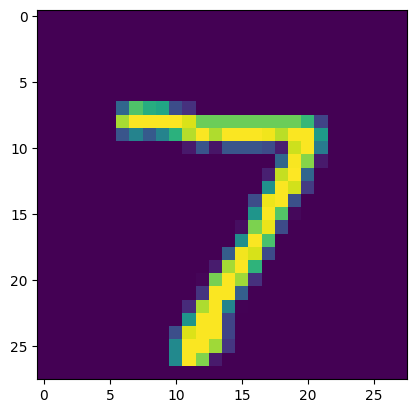

In [18]:
# first data point in x_test
plt.imshow(x_test[0])
plt.show()

In [19]:
# printing y_test label
print(y_test[0])

7


In [20]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [21]:
print(y_pred[0])

[7.5187454e-05 1.7573579e-09 1.0221394e-05 3.6550507e-01 3.0661825e-16
 9.5751531e-02 1.6182612e-18 1.0000000e+00 3.7735455e-05 4.8711953e-01]


In [22]:
# using numpy to get the max label value
output = [np.argmax(i) for i in y_pred]
print(output)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 3, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test ---> True label

output ----> predicted labels.

**CONFUSION MATRIX**

In [23]:
conf_mat = confusion_matrix(y_test, output)

In [24]:
print(conf_mat)

tf.Tensor(
[[ 973    0    1    2    0    0    1    1    2    0]
 [   1 1119    1    3    0    0    3    5    3    0]
 [   5    0 1002    4    1    0    0    9   11    0]
 [   0    0    5  994    0    0    0    5    2    4]
 [   2    0    6    0  946    0    1    7    4   16]
 [   6    0    0   30    0  845    4    2    3    2]
 [   9    2    4    2    2    4  933    0    2    0]
 [   1    1    8    2    1    0    0 1011    1    3]
 [   7    0    2   11    3    4    4    7  935    1]
 [   2    2    0    8    5    3    0    9    2  978]], shape=(10, 10), dtype=int32)


Text(0.5, 151.24999999999994, 'predicted label')

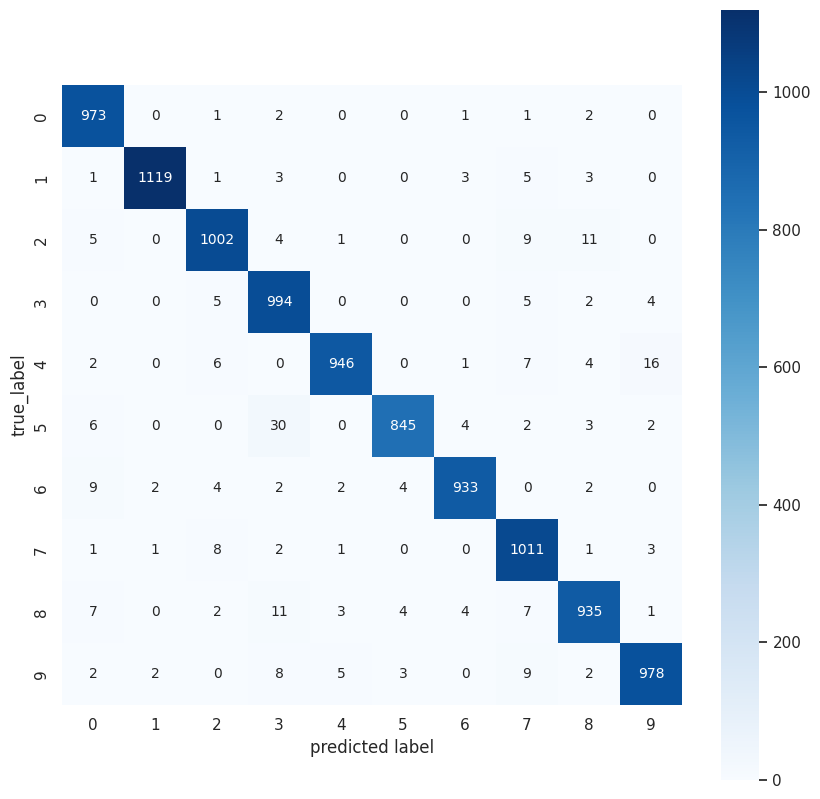

In [27]:
sns.set()
plt.figure(figsize=(10,10))
sns.heatmap(conf_mat, square=True, annot=True, annot_kws={'size':10}, fmt='d',cmap='Blues')
plt.ylabel('true_label')
plt.xlabel('predicted label')

Building a predictive System

In [28]:
 input_img = '/content/08u77.png'
 covert_img = cv2.imread(input_img)
 type(covert_img)

numpy.ndarray

In [29]:
print(covert_img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [30]:
covert_img.shape

(264, 255, 3)

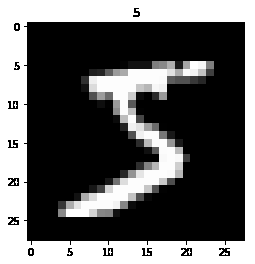

In [32]:
cv2_imshow(covert_img)

In [34]:
grayscale = cv2.cvtColor(covert_img,cv2.COLOR_RGB2GRAY)

In [35]:
grayscale.shape

(264, 255)

In [36]:
#resizing the image
input_img_resize = cv2.resize(grayscale,(28,28))

In [37]:
input_img_resize.shape

(28, 28)

In [38]:
cv2_imshow(input_img_resize)

In [39]:
# scaling the image

input_img_resize = input_img_resize/255

In [41]:
input_img_reshape=np.reshape(input_img_resize,[1,28,28])

In [42]:
type(input_img_reshape)

numpy.ndarray

In [44]:
input_prediction = model.predict(input_img_reshape)
print('result: ',input_prediction)

1/1 [==============================] - 0s 16ms/step
result:  [[7.5289729e-34 9.0047812e-19 8.8439396e-13 9.9903560e-01 0.0000000e+00
  3.8818443e-14 0.0000000e+00 1.0000000e+00 1.2509254e-32 3.3552928e-11]]


In [45]:
final_output = np.argmax(input_prediction)
print('Final Answer: ',final_output)

Final Answer:  7


Adding the processed code in one cell

In [47]:
 input_img = '/content/MNIST_44_0.webp'
 covert_img = cv2.imread(input_img)

 grayscale = cv2.cvtColor(covert_img,cv2.COLOR_RGB2GRAY)
 #resizing the image
input_img_resize = cv2.resize(grayscale,(28,28))
# scaling the image

input_img_resize = input_img_resize/255
input_img_reshape=np.reshape(input_img_resize,[1,28,28])
input_prediction = model.predict(input_img_reshape)
final_output = np.argmax(input_prediction)
print('Final Answer: ',final_output)

1/1 [==============================] - 0s 14ms/step
Final Answer:  0
